# STAGE 3 - Sentiment Analysis and Storage for Company Articles

**Import Libraries**
* **pymysql:** Connects and interacts with the MySQL database.
* **transformers:** Loads the FinBERT model for sentiment analysis.
* **matplotlib.pyplot:** Visualizes sentiment counts as percentages.
* **os:** Used to suppress warnings related to symlink warnings.

In [1]:
import pymysql
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
import matplotlib.pyplot as plt
import os
os.environ["HF_HUB_DISABLE_SYMLINKS_WARNING"] = "1"

**Initialize FinBERT Sentiment Model**
* Loads the FinBERT model and tokenizer using transformers.
* Initializes a sentiment analysis pipeline for predicting the sentiment of text.

In [2]:
# Initialize FinBERT model for sentiment analysis
tokenizer = AutoTokenizer.from_pretrained("yiyanghkust/finbert-tone")
model = AutoModelForSequenceClassification.from_pretrained("yiyanghkust/finbert-tone")
finbert_sentiment = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

**Sentiment Analysis Function**

analyze_sentiment(text): Takes text input, predicts its sentiment (Positive, Neutral, or Negative), and returns the sentiment label and score.

In [3]:
# Function to perform sentiment analysis
def analyze_sentiment(text):
    results = finbert_sentiment(text)
    score = results[0]['score']
    sentiment = results[0]['label']
    return score, sentiment

**Plot Sentiment Counts**
* plot_sentiment_counts(company_name, sentiment_counts):
* Calculates the percentage of Positive, Neutral, and Negative articles.
* Visualizes the sentiment distribution using simple text-based plots.

In [4]:
# Function to plot sentiment counts with percentages
def plot_sentiment_counts(company_name, sentiment_counts):
    total_articles = sum(sentiment_counts.values())
    positive_pct = (sentiment_counts['Positive'] / total_articles) * 100
    neutral_pct = (sentiment_counts['Neutral'] / total_articles) * 100
    negative_pct = (sentiment_counts['Negative'] / total_articles) * 100

    plt.figure(figsize=(5, 2))
    plt.suptitle(f"Sentiment Analysis for {company_name}", fontsize=16, weight='bold')
    
    # Positive sentiment
    plt.subplot(1, 3, 1)
    plt.text(0.5, 0.5, f"{sentiment_counts['Positive']}\n↑ {positive_pct:.1f}%", 
             ha='center', va='center', fontsize=14, color='green', weight='bold')
    plt.title("Positive")
    plt.axis('off')

    # Neutral sentiment
    plt.subplot(1, 3, 2)
    plt.text(0.5, 0.5, f"{sentiment_counts['Neutral']}\n↑ {neutral_pct:.1f}%", 
             ha='center', va='center', fontsize=14, color='gray', weight='bold')
    plt.title("Neutral")
    plt.axis('off')

    # Negative sentiment
    plt.subplot(1, 3, 3)
    plt.text(0.5, 0.5, f"{sentiment_counts['Negative']}\n↑ {negative_pct:.1f}%", 
             ha='center', va='center', fontsize=14, color='red', weight='bold')
    plt.title("Negative")
    plt.axis('off')

    plt.tight_layout(rect=[0, 0, 1, 0.85])
    plt.show()

**Connect to MySQL Database**

Establishes a connection to a MySQL database (STOCK_PREDICTION) and creates a cursor for executing SQL queries.

In [5]:
# Connect to the database
mydb = pymysql.connect( host="localhost", user="root", password="Onmyway09@", database="STOCK_PREDICTION")

# Create the cursor once, outside the loop
mycursor = mydb.cursor()

**Insert Sentiment Data**
* insert_sentiment_score(article_id, company_name, sentiment_score, sentiment_label)
* Inserts sentiment analysis results for an article into the sentiment_scores table.

In [6]:
# Function to insert sentiment data into the database
def insert_sentiment_score(article_id, company_name, sentiment_score, sentiment_label):
    try:
        # SQL query to insert sentiment score
        insert_query = """
        INSERT INTO sentiment_scores (article_id, company_name, sentiment_score, sentiment_label)
        VALUES (%s, %s, %s, %s)
        """
        # Execute the insert query
        mycursor.execute(insert_query, (article_id, company_name, sentiment_score, sentiment_label))
        mydb.commit()
    except Exception as e:
        print(f"Error inserting sentiment score: {e}")

**Main Loop for User Interaction**
* Continuously accepts company names for analysis until the user types stop.

**For Each Company:**
* Fetch Articles: Retrieves articles containing the company name from the database.
* Analyze Sentiment:
    * Performs sentiment analysis for each article.
    * Updates the sentiment counts (Positive, Neutral, Negative).
    * Stores the sentiment results in the database.
* Visualize Sentiments: Plots sentiment counts with percentages.
* Identify Top Articles:
   * Sorts articles by sentiment scores.
   * Displays the top 3 Positive and Negative articles based on their sentiment scores.

Enter a company name to analyze (or type 'stop' to exit):  Tata Motors


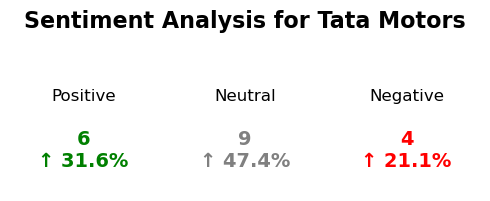


Top Positive Articles:
 - Article ID 636: Tata Motors forecasts a better Q3 led by positive festive season; JLR maintains outlook (Score: 1.00)
 - Article ID 608: Tata Motors shares rise 3% as brokerages stay bullish despite Q2 miss (Score: 1.00)
 - Article ID 644: Tata Motors maintains full-year guidance for JLR, expects improvements in H2 (Score: 1.00)

Top Negative Articles:
 - Article ID 667: Tata Motors shares extend fall, slip 2% ahead of Q2 earnings (Score: 0.74)
 - Article ID 3994: Tata Motors sales dip 11% in July at 71,996 units (Score: 1.00)
 - Article ID 3739: Tata Motors sales dip 8% to 71,693 units in August (Score: 1.00)




Enter a company name to analyze (or type 'stop' to exit):  Tata Steel


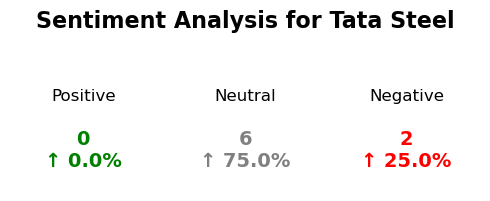


Top Positive Articles:

Top Negative Articles:
 - Article ID 3574: ThyssenKrupp loses legal fight against EU antitrust veto of Tata Steel JV (Score: 0.71)
 - Article ID 3977: Tata Steel: Uninspiring Q1 FY25 prompts revision of risk-reward opportunity (Score: 1.00)




Enter a company name to analyze (or type 'stop' to exit):  Tata Consumer


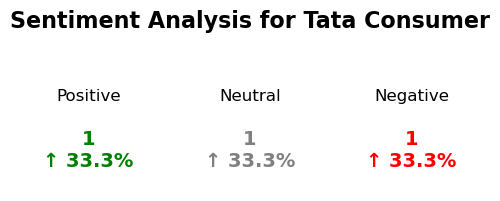


Top Positive Articles:
 - Article ID 3510: Tata Consumer: Mixed bag in Q2; inorganic growth to unlock value (Score: 1.00)

Top Negative Articles:
 - Article ID 4015: Tata Consumer: Acquisition cost weighs on profitability (Score: 1.00)




Enter a company name to analyze (or type 'stop' to exit):  Tata Communication


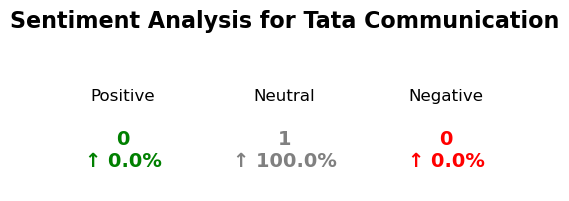


Top Positive Articles:

Top Negative Articles:




Enter a company name to analyze (or type 'stop' to exit):  Trent


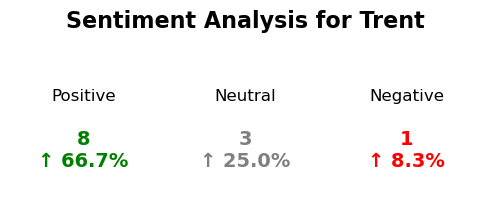


Top Positive Articles:
 - Article ID 589: Trent shares snap five-day losing streak as Goldman Sachs initiates coverage, sees 27% upside (Score: 1.00)
 - Article ID 3881: Trent: Industry-leading show continues (Score: 1.00)
 - Article ID 6336: Trent Q2 has multiple growth levers (Score: 1.00)

Top Negative Articles:
 - Article ID 735: Trent block deal: 13.7 lakh shares sold for Rs 882 crore as stock falls 9% after Q2 results miss estimates (Score: 1.00)




Enter a company name to analyze (or type 'stop' to exit):  Tata Power


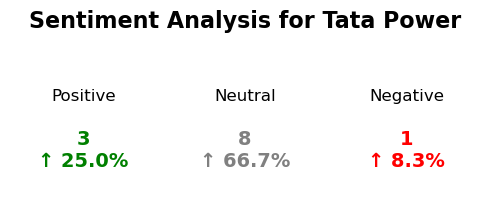


Top Positive Articles:
 - Article ID 6524: Tata Power shares rise 4% as brokerages uphold 'Buy' ratings post Q2 results (Score: 1.00)
 - Article ID 6452: Buy Tata Power Company; target of Rs 540: Sharekhan (Score: 1.00)
 - Article ID 8314: Buy Tata Power Company; target of Rs 460: Geojit Financial Services (Score: 0.99)

Top Negative Articles:
 - Article ID 3618: Tata Power reports fire incident at Trombay Plant, no injuries or loss of life so far (Score: 0.79)




Enter a company name to analyze (or type 'stop' to exit):  Nelco


No articles found with 'Nelco' in the headline.


Enter a company name to analyze (or type 'stop' to exit):  Indian Hotels


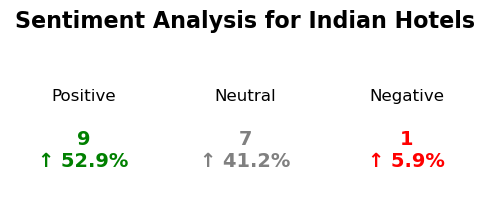


Top Positive Articles:
 - Article ID 721: Indian Hotels Q2 net profit jumps 232% to Rs 554 crore, revenue up 27% (Score: 1.00)
 - Article ID 3412: Indian Hotels Company: Well placed to ride the industry upcycle (Score: 1.00)
 - Article ID 42: Indian Hotels stock hits all-time high, extends rally as Jefferies raises price target (Score: 1.00)

Top Negative Articles:
 - Article ID 7304: Short Call: Adani bribery case sparks fresh jitters: Is the broader market pain finally over? Indian Hotels, Paytm in focus (Score: 1.00)




Enter a company name to analyze (or type 'stop' to exit):  Tata Elxsi


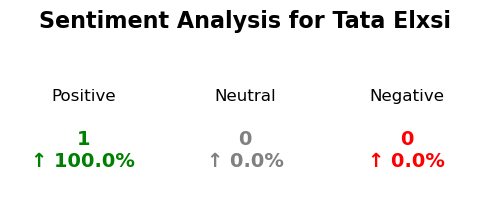


Top Positive Articles:
 - Article ID 6406: Accumulate Tata Elxsi; target of Rs 7901: Geojit Financial Services (Score: 0.69)

Top Negative Articles:




Enter a company name to analyze (or type 'stop' to exit):  Tata Investment


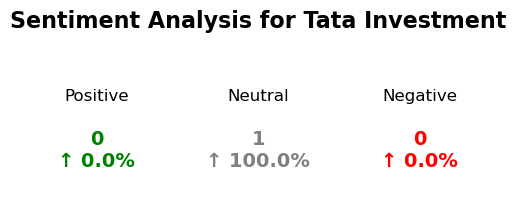


Top Positive Articles:

Top Negative Articles:




Enter a company name to analyze (or type 'stop' to exit):  Titan


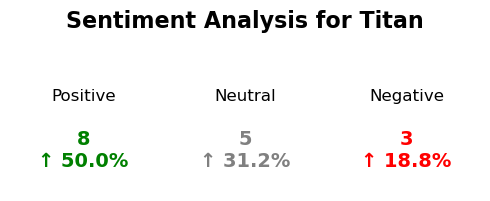


Top Positive Articles:
 - Article ID 3566: Titan Company: Q2 in good shape; healthy long-term outlook (Score: 1.00)
 - Article ID 3430: Titan Company: Second half of FY25 likely to be stronger (Score: 1.00)
 - Article ID 6384: Buy Titan Company; target of Rs 3850: Motilal Oswal (Score: 1.00)

Top Negative Articles:
 - Article ID 6438: Brokerage Radar: Jefferies lowers target for Titan; Nomura cuts price aim on ABB India (Score: 0.99)
 - Article ID 3954: Titan Company: Near-term margin hit; glowing long-term prospects (Score: 1.00)
 - Article ID 7688: Titan Intech Standalone September 2024 Net Sales at Rs 5.20 crore, down 51.24% Y-o-Y (Score: 1.00)




Enter a company name to analyze (or type 'stop' to exit):  Voltas


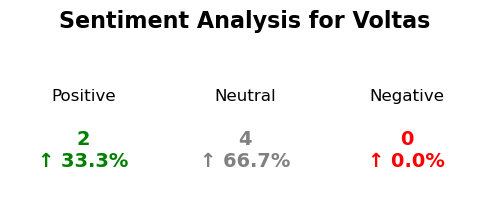


Top Positive Articles:
 - Article ID 6478: Buy Voltas; target of Rs 2070: Motilal Oswal (Score: 1.00)
 - Article ID 6404: Buy Voltas; target of Rs 2018: Anand Rathi (Score: 0.92)

Top Negative Articles:




Enter a company name to analyze (or type 'stop' to exit):  Rallis India


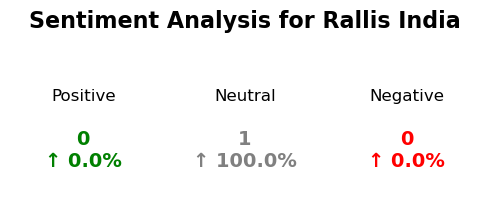


Top Positive Articles:

Top Negative Articles:




Enter a company name to analyze (or type 'stop' to exit):  Tata Chemicals


No articles found with 'Tata Chemicals' in the headline.


Enter a company name to analyze (or type 'stop' to exit):  stop



--- End of Predictions ---



In [7]:
# Main loop to take multiple company names as input and display top positive/negative articles
while True:
    # Take input from the user
    company_name = input("Enter a company name to analyze (or type 'stop' to exit): ")

    # Check if the user wants to stop
    if company_name.lower() == 'stop':
        print("\n--- \033[1mEnd of Predictions\033[0m ---\n")
        break

    # Fetch all articles with the company name in the headline
    try:
        query = "SELECT id, headline FROM stock_articles WHERE headline LIKE %s"
        mycursor.execute(query, ('%' + company_name + '%',))
        articles = mycursor.fetchall()

        if articles:
            sentiment_counts = {'Positive': 0, 'Neutral': 0, 'Negative': 0}
            article_sentiments = []

            for article_id, headline in articles:
                # Analyze sentiment for each article
                score, sentiment = analyze_sentiment(headline)
                article_sentiments.append((article_id, headline, score, sentiment))
                sentiment_counts[sentiment] += 1

                # Insert sentiment score into the database
                insert_sentiment_score(article_id, company_name, score, sentiment)

            # Plot sentiment counts with percentages
            plot_sentiment_counts(company_name, sentiment_counts)

            # Sort articles by sentiment score to identify top positive and negative articles
            positive_articles = sorted(
                [(id, title, score) for id, title, score, sent in article_sentiments if sent == 'Positive'],
                key=lambda x: -x[2]
            )[:3]  # Top 3 positive articles

            negative_articles = sorted(
                [(id, title, score) for id, title, score, sent in article_sentiments if sent == 'Negative'],
                key=lambda x: x[2]
            )[:3]  # Top 3 negative articles

            # Display top positive and negative articles
            print("\n\033[1mTop Positive Articles:\033[0m")
            for article_id, title, score in positive_articles:
                print(f" - Article ID {article_id}: {title} (Score: {score:.2f})")

            print("\n\033[1mTop Negative Articles:\033[0m")
            for article_id, title, score in negative_articles:
                print(f" - Article ID {article_id}: {title} (Score: {score:.2f})")
            
            # Add two lines of spacing after negative articles
            print("\n")
        else:
            print(f"No articles found with '{company_name}' in the headline.")
    except pymysql.MySQLError as err:
        print(f"Error fetching data: {err}")

# Close the cursor and connection only after exiting the loop
mycursor.close()
mydb.close()